# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


C:\Users\koobie\AppData\Local\Temp/ipykernel_10128/330801686.py:6: RuntimeWarning: invalid value encountered in true_divide
  yr = (y + t)/(y - t)


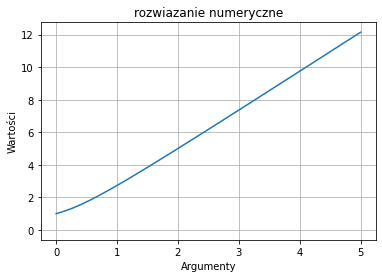

In [1]:
import main
import matplotlib.pyplot as plt
import numpy as np 

def fun(t, y):
    yr = (y + t)/(y - t)
    return yr

y0 = (1, 0)
t_span = np.linspace(0, 5, 1000)
plt.plot(t_span, main.solve_euler(fun, t_span, y0))
plt.grid()
plt.xlabel('Argumenty')
plt.ylabel('Wartości')
plt.title('rozwiazanie numeryczne')
plt.show()


***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

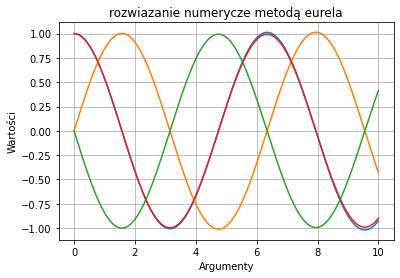

In [2]:
def fun_2(t, y):
    yr = np.zeros((4))
    yr[0] = y[2]
    yr[1] = y[3]
    yr[2] = -(y[0])/(y[0]**2 + y[1]**2)**1.5
    yr[3] = -(y[1])/(y[0]**2 + y[1]**2)**1.5
    return yr

y0 = (1,0,0,1)
t_span = np.linspace(0, 10, 10000)
plt.plot(t_span, main.solve_euler(fun_2, t_span, y0))
plt.grid()
plt.xlabel('Argumenty')
plt.ylabel('Wartości')
plt.title('rozwiazanie numerycze metodą eurela')
plt.show()


***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

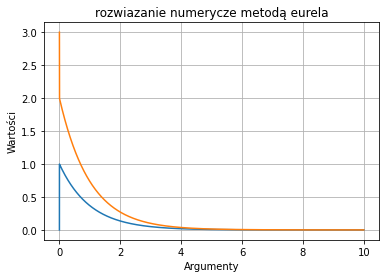

In [3]:
def fun_3(t, x):
    A = np.array([[-667, 333], [666, -334]])
    B = A @ x
    return B

y0 = np.array([0,3])
t_span = np.linspace(0, 10, 10000)
plt.plot(t_span, main.solve_euler(fun_3, t_span, y0))
plt.grid()
plt.xlabel('Argumenty')
plt.ylabel('Wartości')
plt.title('rozwiazanie numerycze metodą eurela')
plt.show()


***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

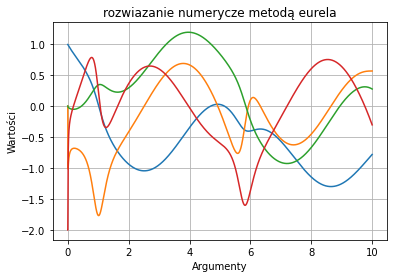

In [4]:
def fun_4(t, y):
    mi = 0.012277471
    mi_prim = 1 - mi
    D1 = (((y[0]+mi)**2)+y[2]**2)**1.5 
    D2 = (((y[0]-mi_prim)**2)+y[2]**2)**1.5 
    yr = np.zeros((4))
    yr[0] = y[1]
    yr[1] = y[0]+2*y[3]-mi_prim*(y[0]+mi)/D1-mi*(y[0]-mi_prim)/D2
    yr[2] = y[3]
    yr[3] = y[2]-2*y[1]-mi_prim*y[2]/D1-mi*y[2]/D2
    return yr

y0 = np.array([0.994,0,0, -2.00158510637908252240537862224])
t_span = np.linspace(0, 10, 50000)
plt.plot(t_span, main.solve_euler(fun_4, t_span, y0))
plt.grid()
plt.xlabel('Argumenty')
plt.ylabel('Wartości')
plt.title('rozwiazanie numerycze metodą eurela')
plt.show()


**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.


In [35]:
import numpy as np
from scipy import linalg
print(np.array([[1,2,7,6],[2,3,6,1],[7,1,5,6]]))
Q, R = linalg.qr(np.array([[1,2,7,6],[2,3,6,1],[7,1,5,6]]))

print(Q[0][2])

[[1 2 7 6]
 [2 3 6 1]
 [7 1 5 6]]
-0.8245297695452178


In [4]:
from scipy.optimize import fsolve

root = fsolve(lambda x: np.exp(6*x)+x, x0=[0])

print(root)

[-0.23873413]


In [10]:
from scipy.optimize import fsolve
from scipy.linalg import lu_factor, lu_solve
import scipy as sc
from numpy import linalg as lg
from scipy import integrate as spint
import numpy as np

# config - start
f = lambda x: np.sqrt(x**3+1)
t = np.linspace(77, 78, 560)
# config - end

value = spint.trapz(f(t), t)

print(value)

682.268436051663


In [16]:
A = np.array([[4, 7], [-5, 2]])
print(A)
odp = np.linalg.cond(A)
print(odp)

[[ 4  7]
 [-5  2]]
1.5342713014188434


In [17]:

A=np.array([[6,9,-4],[-3,3,-5],[4,-9,5]])
b=np.array([31,84,54])
print(A)
print(b)
lu, piv = lu_factor(A)
x = lu_solve((lu, piv), b)

print(x)

[[ 6  9 -4]
 [-3  3 -5]
 [ 4 -9  5]]
[31 84 54]
[ 12.16842105 -20.97192982 -36.68421053]


In [19]:
# config - start
a = 5.080383078206715
# config - end

m_a, e_a = np.frexp(a)
print(e_a)

3


In [20]:
from scipy.interpolate import barycentric_interpolate

# config - start
x=0.7174795775267394
interpolation_nodes_number=28
fun = lambda x: -np.sin(x) + x**3
# config - end

xch = np.cos(np.linspace(1,interpolation_nodes_number,interpolation_nodes_number)*np.pi/interpolation_nodes_number)

fValsX = fun(x)
fValsXch = fun(xch)

print(barycentric_interpolate(xch, fValsXch, x))

-0.28814576712113205


In [23]:
A = np.array([[49,-44,54], [-44,74,-40],[54,-40,140]])
print(A)

eig = lg.eigvals(A)
print(min(eig))

[[ 49 -44  54]
 [-44  74 -40]
 [ 54 -40 140]]
11.525856120784917


In [29]:
A = 553630
b = 0.04579
c = A + b - A
print(A + b - A)
print("{:.20f}".format(c - b))


0.04579000000376254
0.00000000000376254583


In [34]:
A = np.array([[82, 9, 24, 8], [85, 91, 66, 21], [7, 46, 27, 7], [21, 28, 63, 6]])
b = np.array([[47], [88], [58], [44]])
print(A)
print(b)
x = np.linalg.lstsq(A, b)[0]
r = b - np.dot(A, x)
r_norm = float(np.linalg.norm(r))

print("{:.20f}".format(r_norm))


[[82  9 24  8]
 [85 91 66 21]
 [ 7 46 27  7]
 [21 28 63  6]]
[[47]
 [88]
 [58]
 [44]]
0.00000000000025825076


C:\Users\koobie\AppData\Local\Temp/ipykernel_11440/1698143953.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]
